<font size="5"> <a href="https://uspdigital.usp.br/jupiterweb/obterDisciplina?sgldis=MAC0209"> MAC0209 - Modelagem e Simulação</a> </font>

Roberto M. Cesar Jr. (IME-USP)

Roberto Hirata Jr. (IME-USP)
***
<font size="5"> Movimento 1D usando Sistemas dinâmicos, State Vectors e State Space</font>
***

# Introdução: modelagem por sistemas dinâmicos e vetores de estado

Equações diferenciais do movimento:

$$\frac{d^2x}{dt^2} = \frac{dv}{dt} = a(t)$$

$$\frac{dx}{dt} = v(t)$$



Euler:

$$x(t+\Delta t) = x(t) + v(t) \; \Delta t $$

$$v(t+\Delta t) = v(t) + a(t) \; \Delta t $$

Assim, o movimento 1D da partícula pode ser representado por um vetor de estados 

$$\vec{s} = (x,v)$$ 

O vetor de estados 

$$\vec{s}(t) = (x(t),v(t))$$

define a posição e a velocidade da partícula no instante de tempo $t$.  

A implementação do modelo de movimento da partícula com vetor de estados em uma modelagem por sistemas dinâmicos usando o  algoritmo de Euler pode ser definida como:

$$\vec{s}(t+\Delta t) = \vec{s}(t) + \vec{r}(t) \; \Delta t $$

em que $\vec{s}$ é o vetor de estados e $\vec{r}$ é o vetor de taxas de variação.

## Exercício: $\frac{dx}{dt} = 2t+1$

A partícula se movimenta segundo a equação:

$$
v(t) = \frac{dx}{dt} = 2 t + 1
$$

$$ x(0) = 0$$

**Solução analítica:**

$$ x(t) = t^2 + t + c$$

Como $ x(0) = 0 \implies c = 0$

**Solução de Euler:**

$$
x(t + \Delta t) = x(t) + (2 t + 1) \Delta t
$$

$$
v(t + \Delta t) = 2 (t + \Delta t) + 1 = (2 t + 1) + 2 \Delta t = v(t) + 2 \Delta t 
$$

 

### Exercício: Resolva na célula abaixo antes de olhar a solução

O programa abaixo implementa a solucão desse problema **sem** usar a modelagem por sistemas dinâmicos e vetores de estado.

In [0]:
# Escreva sua solucao aqui.

### Resolução: Compare sua solução

In [0]:
# funcoes genericas que podem ser re-usadas em outros problemas

import math
import matplotlib.pyplot as pyplot
import numpy as np

# funcoes base para implementar o Euler. 
# Deve-se implementar a funcao rates, que depende de cada modelo.

def initStateVector(s):
  return(np.array(s))

def updateStateVectorEuler(s,dt):
  return(s + rates(s,dt))

# State Vector Trajectories store state space evolution. Uses list to init empty.

def initSVTrajectory():
  return([])

# append s a svt
def updateSVTrajectory(svt,s):
    svt.append(s)
    return(svt)

def extractSVTrajectory(svt,i): # returns the trajectory as numpy array
    foo = np.array(svt)
    return(foo[:,i])
  
def plotCompareAnalyticalEuler(vxa, vva, vxe, vve, vtime):

    fig, ax = pyplot.subplots()
    pyplot.plot(vtime, vxe, label='Euler',linestyle='',marker='o') 
    pyplot.plot(vtime, vxa, label='Analytical') 
    pyplot.title('Posição')
    ax.set_xlabel('Tempo (segundos)')
    ax.set_ylabel('Posição (metros)')
    pyplot.show(block=False)
    
    fig, ax = pyplot.subplots()
    pyplot.plot(vtime, vve,label='Euler',linestyle='',marker='o')
    pyplot.plot(vtime, vva,label='Analytical')
    pyplot.title('Velocidade')
    ax.set_xlabel('Tempo (segundos)')
    ax.set_ylabel('Velocidade (metros / segundo)')
    pyplot.show()

    fig, ax = pyplot.subplots()
    pyplot.plot(vxe, vve,label='Euler',linestyle='',marker='o')
    pyplot.plot(vxa, vva,label='Analytical')
    pyplot.title('Dynamical System Trajectory')
    ax.set_xlabel('Posição (metros)')
    ax.set_ylabel('Velocidade (metros / segundo)')
    pyplot.show()


def erroTrajetorias(v1,v2,tipoErro):
    if (tipoErro == 0): # erro com sinal
        return(np.array(v1) - np.array(v2))
    elif (tipoErro == 1): # erro quadratico
        return((np.array(v1) - np.array(v2))**2)
    elif (tipoErro == 2): # erro em modulo
        return(fabs((np.array(v1) - np.array(v2))))
    

def easyPlot(v,title):
    pyplot.figure()
    pyplot.plot(v)
    pyplot.title(title)
    pyplot.show()
    

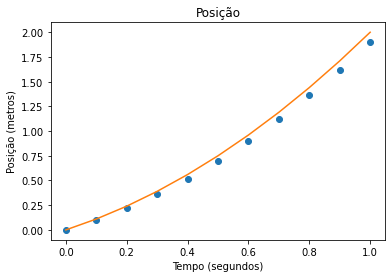

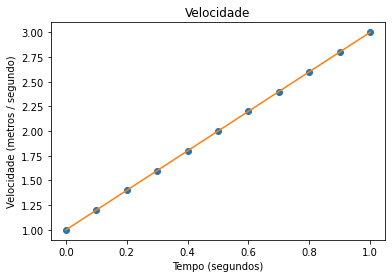

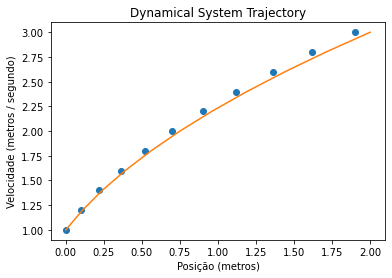

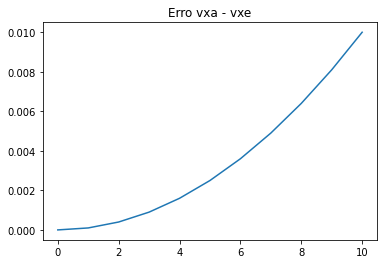

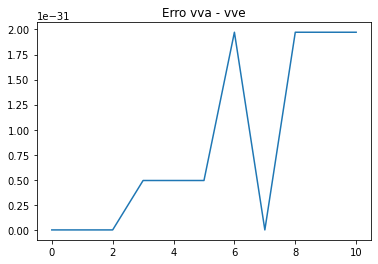

In [4]:
# solucao sem modelagem por sistemas dinamicos e vetor de estados

# dx / dt = 2t + 1

import math
import matplotlib.pyplot as pyplot

def nextXeuler(x,t,dt):
    return (x + (2*t+1) * dt)

def nextVeuler(v,dt):
    return (v + 2*dt)

def nextVa(t):
    return (2*t + 1)

def nextXa(t):
    return (t**2 + t)

def main():
    t=0
    tf = 1
    dt=0.1
    x=0
    v=1
    vva=[]
    vxa=[]
    vve=[]
    vxe=[]
    vtime = []
    while (t<tf):
        vtime.append(t)
        vva.append(nextVa(t))
        vxa.append(nextXa(t))
        vve.append(v)
        vxe.append(x)
        v = nextVeuler(v,dt)
        x = nextXeuler(x,t,dt)
        t += dt

    plotCompareAnalyticalEuler(vxa, vva, vxe, vve, vtime)
    easyPlot(erroTrajetorias(vxa,vxe,1),'Erro vxa - vxe')
    easyPlot(erroTrajetorias(vva,vve,1),'Erro vva - vve')


main() 

### Exercício: Resolva na célula abaixo antes de olhar a solução

Dado que temos a equação analítica da velocidade, vamos usá-la na atualização da coordenada da velocidade no vetor de estados. O programa abaixo implementa a solucão desse problema **com** a modelagem por sistemas dinâmicos e vetores de estado.

In [0]:
# Escreva sua solucao aqui.

### Resolução: Compare sua solução

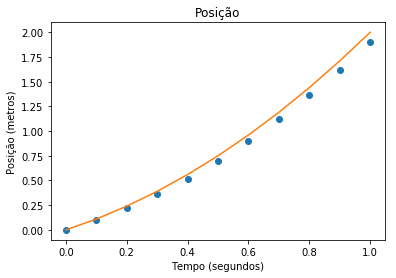

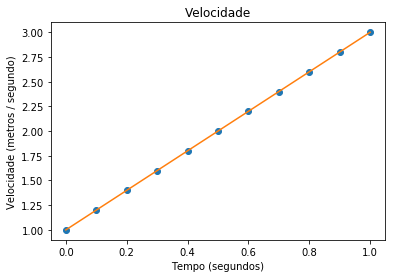

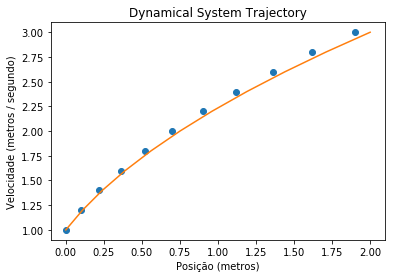

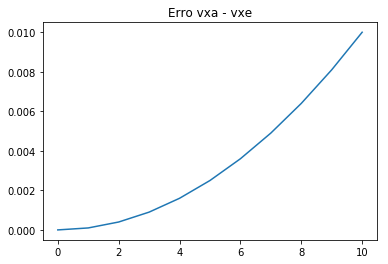

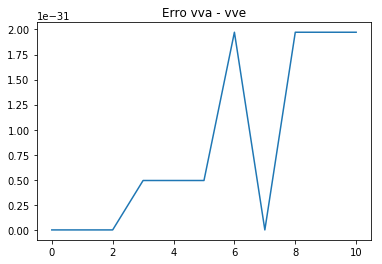

In [0]:
# solucao com a modelagem por sistemas dinamicos e vetor de estados
# Implementa o exercício da integração de Euler de dx(t)/dt = 2t + 1
# compara com o resultado analítico

# Com o uso das funcoes acima e Euler, rates eh a unica funcao a ser
# re-programada na maioria dos problemas

def rates(s,dt):
  r0 = (2 * s[2] + 1) * dt
  r1 = 2 * dt
  r2 = dt
  return(np.array([r0,r1,r2]))

# analitica:
def velocity(t):
  return(2*t + 1)

def updateStateVectorAnalytical(s,dt):
  t = s[2] + dt
  x = t*t + t
  v = velocity(t)
  return(np.array([x,v,t]))

def main():
    t=0
    tf = 1
    dt=0.1
    x=0
    
    # state vector: [position x, velocity v, time t]
    stateVectorEuler = initStateVector([x,velocity(t),t])
    stateVectorAnalytical = initStateVector([x,velocity(t),t])
        
    svtEuler = initSVTrajectory() 
    svtAnalytical = initSVTrajectory() 
    
    while (stateVectorEuler[2]<tf):           
        svtAnalytical = updateSVTrajectory(svtAnalytical,list(stateVectorAnalytical))
        svtvEuler = updateSVTrajectory(svtEuler,list(stateVectorEuler))
        
        stateVectorEuler=updateStateVectorEuler(stateVectorEuler,dt)
        stateVectorAnalytical=updateStateVectorAnalytical(stateVectorAnalytical,dt)
    
  
    vxe = extractSVTrajectory(svtEuler,0)
    vxa = extractSVTrajectory(svtAnalytical,0)
    vve = extractSVTrajectory(svtEuler,1)
    vva = extractSVTrajectory(svtAnalytical,1)
        
    vtime = extractSVTrajectory(svtEuler,2)
        
    plotCompareAnalyticalEuler(vxa, vva, vxe, vve, vtime)
    easyPlot(erroTrajetorias(vxa,vxe,1),'Erro vxa - vxe')
    easyPlot(erroTrajetorias(vva,vve,1),'Erro vva - vve')


main() 

## Exercício: $\frac{d^2x}{dt^2} = 6t$

Escreva a solução para a EDO:

$ \frac{d^2x}{dt^2} = 6t$

### Exercício: Resolva na célula abaixo antes de olhar a solução

O programa abaixo implementa a solucão desse problema **sem** usar a modelagem por sistemas dinâmicos e vetores de estado.

In [0]:
# Escreva sua solucao aqui.

### Resolução: Compare sua solução

Depois de ter escrito sua solução, compare com a resolução abaixo:


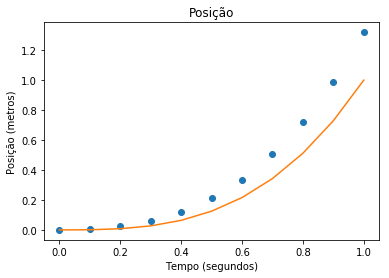

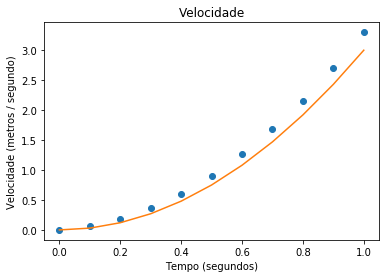

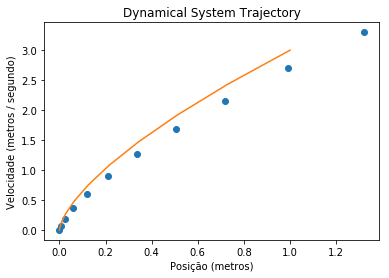

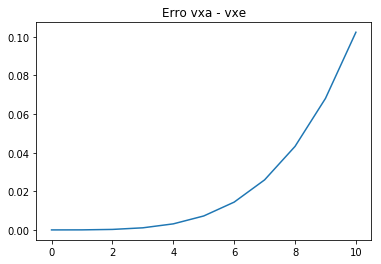

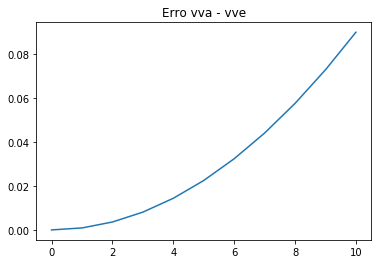

In [0]:
# d2x / dt2 = 6t

import math
import matplotlib.pyplot as pyplot

def nextXeuler(x,v,dt):
    return x+v*dt

def nextVeuler(v,t,dt):
    return v + (6*t*dt)

def nextVa(t):
    return 3*(t**2)

def nextXa(t):
    return t**3

def main():
    t=0
    tf = 1
    dt=0.1
    x=0
    v=0
    vva=[]
    vxa=[]
    vve=[]
    vxe=[]
    vtime = []
    while (t<tf):
        vtime.append(t)
        vva.append(nextVa(t))
        vxa.append(nextXa(t))
        vve.append(v)
        vxe.append(x)
        t += dt
        v = nextVeuler(v,t,dt)
        x = nextXeuler(x,v,dt)

    plotCompareAnalyticalEuler(vxa, vva, vxe, vve, vtime)
    easyPlot(erroTrajetorias(vxa,vxe,1),'Erro vxa - vxe')
    easyPlot(erroTrajetorias(vva,vve,1),'Erro vva - vve')

main() 

### Exercício: Resolva na célula abaixo antes de olhar a solução

O programa abaixo implementa a solucão desse problema **com** a modelagem por sistemas dinâmicos e vetores de estado.

In [0]:
# Escreva sua solucao aqui.

### Resolução: Compare sua solução

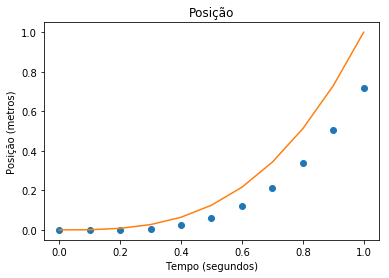

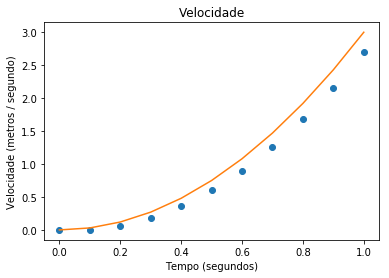

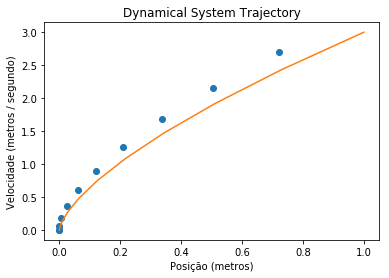

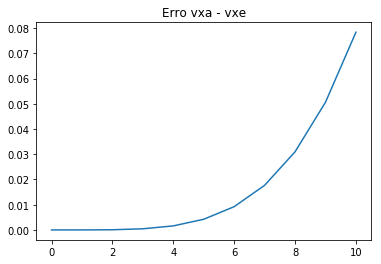

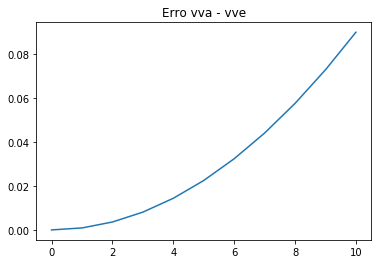

In [0]:
# Implementa o exercício da integração de Euler de d2x/dt2 = 6t
# compara com o resultado analítico

# Euler:
def rates(s,dt):
  r0 = s[1] * dt
  r1 = 6 * s[2] * dt
  r2 = dt
  return(np.array([r0,r1,r2]))

# analitica:

def updateStateVectorAnalytical(s,dt):
  t = s[2] + dt
  x = t**3
  v = 3*(t**2)
  return(np.array([x,v,t]))

def main():
    t=0
    tf = 1
    dt=0.1
    x=0
    v=0
    
    # state vector: [position x, velocity v, time t]
    stateVectorEuler = initStateVector([x,v,t])
    stateVectorAnalytical = initStateVector([x,v,t])
    
    svtEuler = initSVTrajectory() 
    svtAnalytical = initSVTrajectory() 
    
    while (stateVectorEuler[2]<tf):           
      svtAnalytical = updateSVTrajectory(svtAnalytical,list(stateVectorAnalytical))
      svtvEuler = updateSVTrajectory(svtEuler,list(stateVectorEuler))
      
      stateVectorEuler=updateStateVectorEuler(stateVectorEuler,dt)
      stateVectorAnalytical=updateStateVectorAnalytical(stateVectorAnalytical,dt)

    vxe = extractSVTrajectory(svtEuler,0)
    vxa = extractSVTrajectory(svtAnalytical,0)
    vve = extractSVTrajectory(svtEuler,1)
    vva = extractSVTrajectory(svtAnalytical,1)
    
    vtime = extractSVTrajectory(svtEuler,2)


    plotCompareAnalyticalEuler(vxa, vva, vxe, vve, vtime)
    easyPlot(erroTrajetorias(vxa,vxe,1),'Erro vxa - vxe')
    easyPlot(erroTrajetorias(vva,vve,1),'Erro vva - vve')


    
    # PLOTAR O 3D AQUI????????


main() 